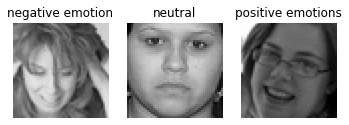

In [3]:
# Using Image  matplotlib importing the images of 7 different catagories
import os
import matplotlib.pyplot as plt #For Visualization
import numpy as np #For numerical calculations
from keras.preprocessing.image import ImageDataGenerator, load_img #To perform Image Data Augmentation and to view the augmented images by converting them into arrayed format

train_dir="train\\"
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(train_dir):
    img = load_img((train_dir + expression +'/'+ os.listdir(train_dir + expression)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

In [4]:
#data augmentation using different parameters.
from keras.preprocessing.image import ImageDataGenerator
data_aug = ImageDataGenerator(rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [5]:
# Using Image Data Generator importing the images from the specified directory into respective train and test variables
from keras.preprocessing.image import ImageDataGenerator#To perform Image Data Augmentation and to view the augmented images by converting them into arrayed format

IDG = ImageDataGenerator(rescale=1./255)
train_set = IDG.flow_from_directory("train/",
                                    target_size=(48, 48),
                                    batch_size=128,
                                    color_mode='grayscale',
                                    class_mode='categorical', shuffle=True)

test_set = IDG.flow_from_directory("test/",
                                   target_size=(48, 48),                            
                                   batch_size=128,
                                   color_mode='grayscale',
                                   class_mode='categorical', shuffle=True)


Found 28273 images belonging to 3 classes.
Found 7067 images belonging to 3 classes.


In [7]:
# Data / Image augmentation by flipping the image
from keras.preprocessing.image import ImageDataGenerator

IDG_flip = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_flip = IDG_flip.flow_from_directory('train\\',
                                                    target_size=(48, 48),
                                                    batch_size=64,
                                                    class_mode='categorical', shuffle=True)

Found 28273 images belonging to 3 classes.



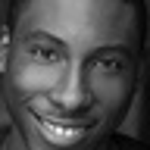
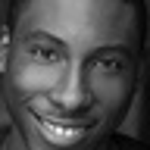
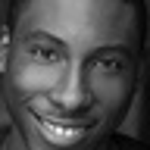
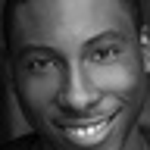


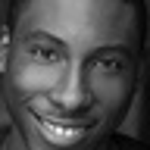
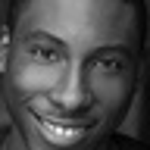
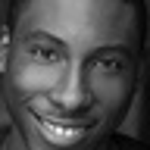
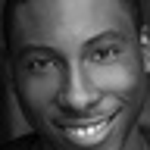

In [8]:
# Plotting the flipped Images
#!pip install ipyplot
import ipyplot # fast way to plot images

flip_images = [train_flip[0][0][0] for i in range(4)]
ipyplot.plot_images(flip_images)

In [9]:
# Importing Required Libraries required for the model
from tensorflow import keras #Keras library to import raw ingredients for ConvNet Deep Learning Model
from keras.models import Sequential #To group a linear stack of layers for ConvNet model
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D, MaxPooling2D
from keras.optimizers import RMSprop,Adam # train netural network
from keras.regularizers import l1,l2
from keras.layers.normalization import BatchNormalization

# Model Initialization
model = Sequential()   

# Adding convolutional neural network layers
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape =(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
# Adding Dense layers
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))


# Model Compilation
model.compile(loss = 'categorical_crossentropy',optimizer = Adam(learning_rate=0.001,decay=1e-6),metrics = ['accuracy'])

# Fitting the Model
history = model.fit(train_set,validation_data=test_set, epochs=15)      


Epoch 1/15
221/221 [==============================] - 721s 3s/step - loss: 4.6334 - accuracy: 0.4875 - val_loss: 11.6288 - val_accuracy: 0.3686
Epoch 2/15
221/221 [==============================] - 683s 3s/step - loss: 1.7177 - accuracy: 0.5730 - val_loss: 5.4435 - val_accuracy: 0.4037
Epoch 3/15
221/221 [==============================] - 1081s 5s/step - loss: 1.1872 - accuracy: 0.6185 - val_loss: 1.4894 - val_accuracy: 0.5326
Epoch 4/15
221/221 [==============================] - 703s 3s/step - loss: 0.9429 - accuracy: 0.6630 - val_loss: 1.2793 - val_accuracy: 0.5390
Epoch 5/15
221/221 [==============================] - 702s 3s/step - loss: 0.8217 - accuracy: 0.6913 - val_loss: 0.8653 - val_accuracy: 0.6679
Epoch 6/15
221/221 [==============================] - 709s 3s/step - loss: 0.7367 - accuracy: 0.7216 - val_loss: 0.8576 - val_accuracy: 0.6532
Epoch 7/15
221/221 [==============================] - 700s 3s/step - loss: 0.6751 - accuracy: 0.7487 - val_loss: 0.8343 - val_accuracy: 0.66

In [10]:
test_evaluation = model.evaluate(test_set)
print("accuracy: {:.2f}%".format(test_evaluation[1] * 100))
print("Loss: ",test_evaluation[0])

56/56 [==============================] - 30s 528ms/step - loss: 1.0715 - accuracy: 0.7147
accuracy: 71.47%
Loss:  1.0714901685714722


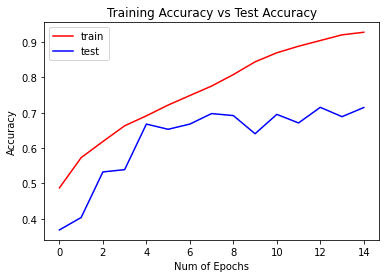

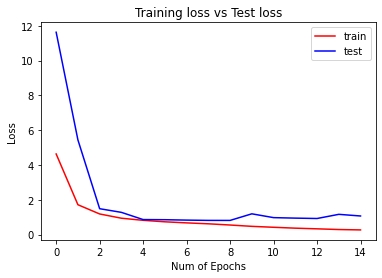

In [11]:
# Plotting the train and test accuracy and loss

import matplotlib.pyplot as plt #For Visualization
import numpy as np

plt.figure(0)
plt.plot(history.history['accuracy'], 'r', history.history['val_accuracy'], 'b')
plt.xticks(np.arange(0, 16, 2.0))
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Test Accuracy")
plt.legend(['train','test'])

plt.figure(1)
plt.plot(history.history['loss'], 'r', history.history['val_loss'], 'b')
plt.xticks(np.arange(0, 16, 2.0))
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training loss vs Test loss")
plt.legend(['train','test'])

### Saving this model 

In [13]:
import warnings
warnings.filterwarnings('ignore')
model.save("face_model",save_format='tf')
print("Saved model to disk ")

INFO:tensorflow:Assets written to: face_model\assets
Saved model to disk 


### Reloading the model

In [14]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model

# load model
model = load_model('face_model')
# summarize model.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 256)       2